# Pythagorean Triples

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Definition and Construction

A **Pythagorean Triple** is a triple of counting numbers $<a, b, c>$ such that $a^2 + b^2 = c^2$. The smallest such triple is $<3, 4, 5>$.

It turns out to be relatively easy to find Pythagorean Triples. Since $a^2 + b^2 = c^2$, it must be that $a^2 = c^2 - b^2 = (c - b)(c + b)$. So we just have to consider the prime factorization of $a^2$ to find all such triples for a given $a$.

Notice that $c - b$ and $c + b$ must be either both even or both odd.

There is one little complication: We want to insist that $a < b$. We might observe that $12^2 = 8\times 18$ and set:

$c - b = 8$ and $c + b = 18$.

If we solve these equations for $b$ and $c$ we find that:

$b = 5$ and $c = 13$,

which corresponds to the triple $<12, 5, 13>$. But that is of course not interestingly different from the triple $<5, 12, 13>$. So we'll insist that $a < b$. If so, how large can we allow $c - b$ to be?

Consider the limit as $a\rightarrow b$. In that case we'd have $2a^2 = c^2$, and so we'd have $c - b = c - a = a\sqrt{2} - a = a(\sqrt{2} - 1)\approx 0.4142a$.

In [2]:
np.sqrt(2)

1.4142135623730951

Suppose for example that we are interested in finding all Pythagorean Triples $<a, b, c>$ for $a = 20$.

Now $20^2 = 400 = 2^4\times 5^2$.

So we can have the following possibilities:

<table>
    <tr>
        <th>c-b</th>
        <th>c+b</th>
    </tr>
    <tr>
        <td>8</td>
        <td>50</td>
    </tr>
    <tr>
        <td>4</td>
        <td>100</td>
    </tr>
    <tr>
        <td>2</td>
        <td>200</td>
    </tr>
</table>

Solving these for $b$ and $c$, we find the triples: $<20, 21, 29>$, $<20, 48, 52>$, and $<20, 99, 101>$. Note that $<20, 48, 52>$ is a multiple of the "primitive" triple $<5, 12, 13>$: If $a^2 + b^2 = c^2$, then $(ka)^2 + (kb)^2 = k^2a^2 + k^2b^2 = k^2(a^2 + b^2) = k^2c^2 = (kc)^2$.

## In Code

Let's write a function that will find all Pythagorean Triples for a given $a$.

In [3]:
def find_pyth_trips(a, just_num=False):
    """This function returns all Pythagorean Triples
    [a, b, c] (where b > a) for given a. The return is
    in the form of a Pandas DataFrame. If only a count
    of the number of such triples is desired, set the
    just_num parameter to True."""
    
    # Imports
    import numpy as np
    import pandas as pd
    
    prod = a**2
    
    # Set the maximum allowed value for (c - b)
    max_ = int(a * (np.sqrt(2) - 1))
    
    # If we're just counting, initialize a counter
    if just_num:
        ctr = 0
    
    # Otherwise, initialize a list
    else:
        out = []
    
    # Odd a
    if a % 2 == 1:
        
        # (c - b) and (c + b) must both be odd
        if max_ % 2 == 0:
            max_ -= 1
        
        # Check to see if the number divides evenly
        for num in np.arange(int(max_), 0, -2):
            
            # If so, then either add one to the counter
            # or add the triple to the list
            if prod / num == int(prod / num):
                if just_num:
                    ctr += 1
                else:
                    
                    # Solve for b and c by the identities:
                    # b = (c + b) / 2 - (c - b) / 2;
                    # c = (c + b) / 2 + (c - b) / 2
                    b = (prod // num - num) // 2
                    c = (prod // num + num) // 2
                    out.append([a, b, c])
    
    # Even a has a slight complication, which is that we need
    # to make sure that *both* (c - b) and (c + b) are even
    else:
        if max_ % 2 == 1:
            max_ -= 1
        for num in np.arange(int(max_), 1, -2):
            if prod / num == int(prod / num) and prod / num % 2 == 0:
                if just_num:
                    ctr += 1
                else:
                    b = (prod // num - num) // 2
                    c = (prod // num + num) // 2
                    out.append([a, b, c])
    
    # Once we're through the lowest value of (c - b), i.e. the
    # highest value of b, stop and return the counter or list
    if just_num:
        return ctr
    else:
        return pd.DataFrame(out, columns=['a', 'b', 'c'])

In [4]:
find_pyth_trips(3)

,a,b,c
0,3,4,5


In [5]:
find_pyth_trips(20)

,a,b,c
0,20,21,29
1,20,48,52
2,20,99,101


In [6]:
find_pyth_trips(2520)

,a,b,c
0,2520,2646,3654
1,2520,2750,3730
2,2520,3078,3978
3,2520,3159,4041
4,2520,3243,4107
...,...,...,...
80,2520,317515,317525
81,2520,396896,396904
82,2520,529197,529203
83,2520,793798,793802


In [7]:
find_pyth_trips(13568)

,a,b,c
0,13568,13575,19193
1,13568,20424,24520
2,13568,25440,28832
3,13568,43920,45968
4,13568,53424,55120
5,13568,89376,90400
6,13568,108120,108968
7,13568,179520,180032
8,13568,216876,217300
9,13568,359424,359680


In [8]:
find_pyth_trips(10080, just_num=True)

159

Let's count the number of Pythagorean Triples for $a\leq 200$:

In [9]:
num_of_trips = {}
for a in range(1, 201):
    num_of_trips[a] = find_pyth_trips(a, just_num=True)

In [10]:
num_of_trips

{1: 0,
 2: 0,
 3: 1,
 4: 0,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 2,
 10: 1,
 11: 1,
 12: 2,
 13: 1,
 14: 1,
 15: 3,
 16: 2,
 17: 1,
 18: 2,
 19: 1,
 20: 3,
 21: 3,
 22: 1,
 23: 1,
 24: 4,
 25: 2,
 26: 1,
 27: 3,
 28: 3,
 29: 1,
 30: 3,
 31: 1,
 32: 3,
 33: 4,
 34: 1,
 35: 3,
 36: 5,
 37: 1,
 38: 1,
 39: 4,
 40: 5,
 41: 1,
 42: 3,
 43: 1,
 44: 3,
 45: 5,
 46: 1,
 47: 1,
 48: 7,
 49: 2,
 50: 2,
 51: 4,
 52: 3,
 53: 1,
 54: 3,
 55: 3,
 56: 5,
 57: 4,
 58: 1,
 59: 1,
 60: 9,
 61: 1,
 62: 1,
 63: 5,
 64: 4,
 65: 4,
 66: 4,
 67: 1,
 68: 3,
 69: 4,
 70: 3,
 71: 1,
 72: 8,
 73: 1,
 74: 1,
 75: 6,
 76: 3,
 77: 3,
 78: 4,
 79: 1,
 80: 7,
 81: 4,
 82: 1,
 83: 1,
 84: 9,
 85: 4,
 86: 1,
 87: 4,
 88: 6,
 89: 1,
 90: 5,
 91: 3,
 92: 3,
 93: 4,
 94: 1,
 95: 4,
 96: 10,
 97: 1,
 98: 2,
 99: 6,
 100: 6,
 101: 1,
 102: 4,
 103: 1,
 104: 6,
 105: 9,
 106: 1,
 107: 1,
 108: 8,
 109: 1,
 110: 3,
 111: 4,
 112: 7,
 113: 1,
 114: 4,
 115: 4,
 116: 3,
 117: 6,
 118: 1,
 119: 4,
 120: 15,
 121: 2,
 122: 1,
 123: 4,

Numbers with lots of factors will have lots of triples!

$180 = 2^2\times 3^2\times 5$, so $180^2 = 2^4\times 3^4\times  5^2$

In [11]:
find_pyth_trips(180)

,a,b,c
0,180,189,261
1,180,240,300
2,180,273,327
3,180,299,349
4,180,385,425
5,180,432,468
6,180,525,555
7,180,663,687
8,180,800,820
9,180,891,909


$2520 = 2^3\times 3^2\times 5\times 7$, so $2520^2 = 2^6\times 3^4\times 5^2\times 7^2$

In [12]:
find_pyth_trips(2520)

,a,b,c
0,2520,2646,3654
1,2520,2750,3730
2,2520,3078,3978
3,2520,3159,4041
4,2520,3243,4107
...,...,...,...
80,2520,317515,317525
81,2520,396896,396904
82,2520,529197,529203
83,2520,793798,793802


$100800 = 2^6\times 3^2\times 5^2\times 7$, so $100800^2 = 2^{12}\times 3^4\times 5^4\times 7^2$

In [13]:
find_pyth_trips(100800, just_num=True)

341

In [14]:
find_pyth_trips(100800)[:10]

,a,b,c
0,100800,101764,143236
1,100800,105190,145690
2,100800,105840,146160
3,100800,107008,147008
4,100800,108155,147845
5,100800,110000,149200
6,100800,113100,151500
7,100800,115500,153300
8,100800,116184,153816
9,100800,119865,156615


Let's use `find_pyth_trips()` to build a new function that will find all Pythagorean Triples between $a_1$ and $a_2$.

In [15]:
def triples_between_a1_a2(a2, a1=3):
    """This function will return all Pythagorean Triples
    from <a1, b, c> up to <a2, b, c>, ordering by a and
    then by b."""

    df = pd.DataFrame()
    for num in range(a1, a2+1):
        df = pd.concat([df, find_pyth_trips(num)])
    return df.reset_index(drop=True)

In [16]:
triples_between_a1_a2(20)

,a,b,c
0,3,4,5
1,5,12,13
2,6,8,10
3,7,24,25
4,8,15,17
5,9,12,15
6,9,40,41
7,10,24,26
8,11,60,61
9,12,16,20


## The Ratio $\frac{c-b}{a}$

Above we calculated that the ratio $\frac{c-b}{a}$ cannot exceed $\sqrt{2}-1$. The rational numbers $\mathscr{Q}$ get arbitrarily close to this limit, so if we counted high enough we could find a triple with a value of $\frac{c-b}{a}$ as close we liked to $\sqrt{2}-1$.

But how close do we get in, say, the triples with $a\leq 100000$?

The `triples_between_a1_a2()` function can take some time to run, so we'll do this in steps.

We'll add a column to the DataFrame that records the ratio $\frac{c-b}{a}$ and then we'll sort by that in descending order and look at the top ten.

In [17]:
trips_10000 = triples_between_a1_a2(10000)
trips_10000['ratio'] = (trips_10000['c'] - trips_10000['b']) / trips_10000['a']
trips_10000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
77522,8118,8120,11482,0.414141
33313,4059,4060,5741,0.414141
8804,1392,1394,1970,0.413793
20939,2784,2788,3940,0.413793
56610,6264,6273,8865,0.413793
88392,9048,9061,12805,0.413793
96618,9744,9758,13790,0.413793
3645,696,697,985,0.413793
27580,3480,3485,4925,0.413793
14643,2088,2091,2955,0.413793


In [18]:
trips_20000 = triples_between_a1_a2(20000, a1=10001)
trips_20000['ratio'] = (trips_20000['c'] - trips_20000['b']) / trips_20000['a']
trips_20000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
26581,12177,12180,17223,0.414141
78568,16236,16240,22964,0.414141
44118,13568,13575,19193,0.414062
2437,10205,10212,14437,0.414013
117215,19135,19152,27073,0.413953
66533,15312,15334,21670,0.413793
13740,11136,11152,15760,0.413793
48573,13920,13940,19700,0.413793
57479,14616,14637,20685,0.413793
93988,17400,17425,24625,0.413793


In [19]:
trips_30000 = triples_between_a1_a2(30000, a1=20001)

In [20]:
trips_30000['ratio'] = (trips_30000['c'] - trips_30000['b']) / trips_30000['a']
trips_30000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
50520,23660,23661,33461,0.414201
118309,28413,28420,40187,0.414141
60281,24354,24360,34446,0.414141
3941,20295,20300,28705,0.414141
99952,27136,27150,38386,0.414062
5543,20410,20424,28874,0.414013
121673,28644,28667,40525,0.413978
120060,28536,28577,40385,0.413793
80117,25752,25789,36445,0.413793
11927,20880,20910,29550,0.413793


In [21]:
trips_40000 = triples_between_a1_a2(40000, a1=30001)

In [22]:
trips_40000['ratio'] = (trips_40000['c'] - trips_40000['b']) / trips_40000['a']
trips_40000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
96979,36531,36540,51669,0.414141
36227,32472,32480,45928,0.414141
8930,30615,30636,43311,0.414013
123289,38270,38304,54146,0.413953
12328,30849,30880,43649,0.413919
29524,32016,32062,45310,0.413793
91861,36192,36244,51220,0.413793
60495,34104,34153,48265,0.413793
39825,32712,32759,46295,0.413793
50145,33408,33456,47280,0.413793


In [23]:
trips_50000 = triples_between_a1_a2(50000, a1=40001)

In [24]:
trips_50000['ratio'] = (trips_50000['c'] - trips_50000['b']) / trips_50000['a']
trips_50000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
113653,47320,47322,66922,0.414201
8976,40590,40600,57410,0.414141
135566,48708,48720,68892,0.414141
71870,44649,44660,63151,0.414141
41194,42676,42693,60365,0.414097
10729,40704,40725,57579,0.414062
12515,40820,40848,57748,0.414013
144871,49288,49335,69737,0.413934
82745,45347,45396,64165,0.413897
48501,43152,43214,61070,0.413793


In [25]:
trips_60000 = triples_between_a1_a2(60000, a1=50001)

In [26]:
trips_60000['ratio'] = (trips_60000['c'] - trips_60000['b']) / trips_60000['a']
trips_60000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
153057,59496,59503,84145,0.414179
44057,52767,52780,74633,0.414141
109585,56826,56840,80374,0.414141
34790,52185,52208,73817,0.414085
68314,54272,54300,76772,0.414062
16238,51025,51060,72185,0.414013
117089,57288,57334,81050,0.413978
118970,57405,57456,81219,0.413953
79788,54984,55063,77815,0.413793
1668,50112,50184,70920,0.413793


In [27]:
trips_70000 = triples_between_a1_a2(70000, a1=60001)
trips_70000['ratio'] = (trips_70000['c'] - trips_70000['b']) / trips_70000['a']
trips_70000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
81317,64944,64960,91856,0.414141
149027,69003,69020,97597,0.414141
14377,60885,60900,86115,0.414141
129527,67840,67875,95965,0.414062
119830,67260,67301,95149,0.414035
20084,61230,61272,86622,0.414013
27788,61698,61760,87298,0.413919
43123,62629,62700,88621,0.413882
77798,64728,64821,91605,0.413793
31863,61944,62033,87665,0.413793


In [28]:
trips_80000 = triples_between_a1_a2(80000, a1=70001)
trips_80000['ratio'] = (trips_80000['c'] - trips_80000['b']) / trips_80000['a']
trips_80000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
16271,70980,70983,100383,0.414201
153986,79097,79104,111865,0.414188
51407,73062,73080,103338,0.414141
120325,77121,77140,109079,0.414141
10392,70623,70664,99905,0.414044
24042,71435,71484,101059,0.414013
110330,76540,76608,108292,0.413953
92691,75500,75579,106829,0.413907
75262,74472,74579,105395,0.413793
110627,76560,76670,108350,0.413793


In [29]:
trips_90000 = triples_between_a1_a2(90000, a1=80001)
trips_90000['ratio'] = (trips_90000['c'] - trips_90000['b']) / trips_90000['a']
trips_90000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
20131,81180,81200,114820,0.414141
160590,89298,89320,126302,0.414141
90089,85239,85260,120561,0.414141
138361,88020,88051,124501,0.414110
92186,85352,85386,120730,0.414097
24189,81408,81450,115158,0.414062
28102,81640,81696,115496,0.414013
102157,85932,86001,121575,0.413978
46244,82695,82792,117017,0.413870
12655,80736,80852,114260,0.413793


In [30]:
trips_100000 = triples_between_a1_a2(100000, a1=90001)
trips_100000['ratio'] = (trips_100000['c'] - trips_100000['b']) / trips_100000['a']
trips_100000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
81110,94640,94644,133844,0.414201
129977,97416,97440,137784,0.414141
58592,93357,93380,132043,0.414141
87040,94976,95025,134351,0.414062
32166,91845,91908,129933,0.414013
129928,97412,97485,137813,0.413994
99236,95675,95760,135365,0.413953
150610,98576,98670,139474,0.413934
44405,92547,92640,130947,0.413919
12025,90694,90792,128330,0.413897


Our winner is $<23660, 23661, 33461>$, with a ratio of $\frac{c-b}{a} = \frac{70}{169}\approx 0.4142$.

In [31]:
70/169

0.41420118343195267

In [32]:
find_pyth_trips(23660)

,a,b,c
0,23660,23661,33461
1,23660,24843,34307
2,23660,26208,35308
3,23660,27456,36244
4,23660,28899,37349
5,23660,38025,44785
6,23660,40755,47125
7,23660,52377,57473
8,23660,54672,59572
9,23660,56784,61516


## Counting and Plotting Triples by the Ratio $\frac{c-b}{a}$

Let's build a function that will show all the possible values of the ratio $\frac{c-b}{a}$.

In [33]:
def calc_pyth_ratios(n, show_plot=True):
    """This function assembles, and, optionally, plots
    all positive integer ratios less than sqrt(2) - 1."""
    
    # Imports
    import numpy as np
    from matplotlib import pyplot as plt
    
    # Set the limit
    limit = np.sqrt(2) - 1
    points = []
    for denom in np.arange(3, n+1):
        interval = []
        ctr = 1
        
        # Check to make sure that we're still
        # below the theoretical limit
        while ctr / denom < limit:
            interval.append(round(ctr / denom, 5))
            ctr += 1
        points.append(interval)
    
    if show_plot:
        fig, ax = plt.subplots(figsize=(8, 8))
        
        # Draw the limit with a vertical line
        ax.vlines(limit, ymin=1, ymax=n-2, label='$\sqrt{2} - 1$')
        
        # We need as many corresponding y-values
        # as we have ratios for a given denominator
        y = []
        
        # We'll have the y-values start at 1 rather
        # than 3
        for num in np.arange(n-2, 0, -1):
            y.append([num] * len(points[n - num - 2]))
        for X, Y in zip(points, y):
            ax.scatter(X, Y)
        plt.axis()
        ax.legend();
    return points

[[0.33333],
 [0.25],
 [0.2, 0.4],
 [0.16667, 0.33333],
 [0.14286, 0.28571],
 [0.125, 0.25, 0.375]]

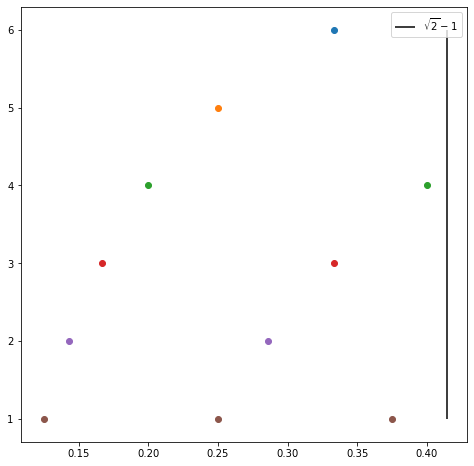

In [34]:
calc_pyth_ratios(8)

[[0.33333],
 [0.25],
 [0.2, 0.4],
 [0.16667, 0.33333],
 [0.14286, 0.28571],
 [0.125, 0.25, 0.375],
 [0.11111, 0.22222, 0.33333],
 [0.1, 0.2, 0.3, 0.4],
 [0.09091, 0.18182, 0.27273, 0.36364],
 [0.08333, 0.16667, 0.25, 0.33333],
 [0.07692, 0.15385, 0.23077, 0.30769, 0.38462],
 [0.07143, 0.14286, 0.21429, 0.28571, 0.35714],
 [0.06667, 0.13333, 0.2, 0.26667, 0.33333, 0.4],
 [0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375],
 [0.05882, 0.11765, 0.17647, 0.23529, 0.29412, 0.35294, 0.41176],
 [0.05556, 0.11111, 0.16667, 0.22222, 0.27778, 0.33333, 0.38889],
 [0.05263, 0.10526, 0.15789, 0.21053, 0.26316, 0.31579, 0.36842],
 [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

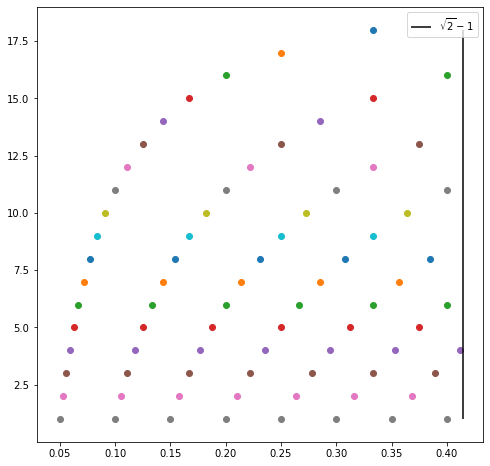

In [35]:
calc_pyth_ratios(20)

In [36]:
calc_pyth_ratios(20, show_plot=False)

[[0.33333],
 [0.25],
 [0.2, 0.4],
 [0.16667, 0.33333],
 [0.14286, 0.28571],
 [0.125, 0.25, 0.375],
 [0.11111, 0.22222, 0.33333],
 [0.1, 0.2, 0.3, 0.4],
 [0.09091, 0.18182, 0.27273, 0.36364],
 [0.08333, 0.16667, 0.25, 0.33333],
 [0.07692, 0.15385, 0.23077, 0.30769, 0.38462],
 [0.07143, 0.14286, 0.21429, 0.28571, 0.35714],
 [0.06667, 0.13333, 0.2, 0.26667, 0.33333, 0.4],
 [0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375],
 [0.05882, 0.11765, 0.17647, 0.23529, 0.29412, 0.35294, 0.41176],
 [0.05556, 0.11111, 0.16667, 0.22222, 0.27778, 0.33333, 0.38889],
 [0.05263, 0.10526, 0.15789, 0.21053, 0.26316, 0.31579, 0.36842],
 [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

[[0.33333],
 [0.25],
 [0.2, 0.4],
 [0.16667, 0.33333],
 [0.14286, 0.28571],
 [0.125, 0.25, 0.375],
 [0.11111, 0.22222, 0.33333],
 [0.1, 0.2, 0.3, 0.4],
 [0.09091, 0.18182, 0.27273, 0.36364],
 [0.08333, 0.16667, 0.25, 0.33333],
 [0.07692, 0.15385, 0.23077, 0.30769, 0.38462],
 [0.07143, 0.14286, 0.21429, 0.28571, 0.35714],
 [0.06667, 0.13333, 0.2, 0.26667, 0.33333, 0.4],
 [0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375],
 [0.05882, 0.11765, 0.17647, 0.23529, 0.29412, 0.35294, 0.41176],
 [0.05556, 0.11111, 0.16667, 0.22222, 0.27778, 0.33333, 0.38889],
 [0.05263, 0.10526, 0.15789, 0.21053, 0.26316, 0.31579, 0.36842],
 [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
 [0.04762, 0.09524, 0.14286, 0.19048, 0.2381, 0.28571, 0.33333, 0.38095],
 [0.04545,
  0.09091,
  0.13636,
  0.18182,
  0.22727,
  0.27273,
  0.31818,
  0.36364,
  0.40909],
 [0.04348,
  0.08696,
  0.13043,
  0.17391,
  0.21739,
  0.26087,
  0.30435,
  0.34783,
  0.3913],
 [0.04167, 0.08333, 0.125, 0.16667, 0.20833, 0.25, 0.29167, 0.3

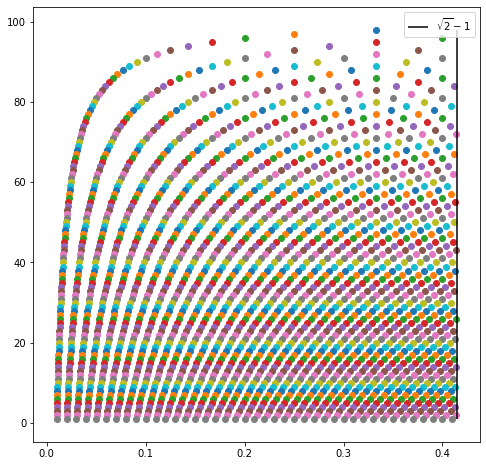

In [37]:
calc_pyth_ratios(100)

Let's write a function that will dynamically keep track of the ratio largest to $\sqrt{2} - 1$ as we count up through our fractions starting at $\frac{1}{3}$ (i.e. $\frac{1}{3}, \frac{1}{4}, \frac{1}{5}, \frac{2}{5}$, etc.).

In [38]:
def max_pyth_ratio(n):
    """This function will keep track of our ratios (c-b)/a
    as they get closer to the limit of sqrt(2) - 1."""
    
    # Imports
    import numpy as np
    from matplotlib import pyplot as plt
    
    # Set the limit
    limit = np.sqrt(2) - 1
    
    # Initialize the growing list
    out = [(0, 0, 0)]
    for denom in np.arange(3, n+1):
        interval = []
        ctr = 1
        
        # Gather all the ratios for a given
        # denominator that are below the limit
        while ctr / denom < limit:
            interval.append(round(ctr / denom, 5))
            ctr += 1
        
        # If the last ratio is larger than the
        # current leader, add it to the list
        if interval[-1] > out[-1][2]:
            out.append((ctr - 1, denom, interval[-1]))
    return out

Let's go up through twentieths:

In [39]:
max_pyth_ratio(20)

[(0, 0, 0), (1, 3, 0.33333), (2, 5, 0.4), (7, 17, 0.41176)]

Let's calculate the triples corresponding to these ratios. There is some complexity here. We know what the value of $\frac{c-b}{a}$ is, but it doesn't follow from that that we know the values of $a$, $b$, and $c$.

Take, for example, the ratio of $\frac{2}{5}$. This ratio is of course a possible value of $\frac{c-b}{a}$ (since it's less than $\sqrt{2} - 1$), but that doesn't mean that we can find a triple with $c - b = 2$ and $a = 5$. Indeed, $2$ is not a factor of $a^2 = 25$, and so we need to multiply our ratio $\frac{2}{5}$ top and bottom by common factors to get something divisibe by both $c-b$ and $a$. And in fact just finding the least common multiple (LCM) of $c-b$ and $a$ is not always sufficient. The LCM of $2$ and $5$ is $10$, but $c - b = 4$ and $a = 10$ won't yield a triple because in that case we'd have $c + b = 25$, and there is no triple where $c - b$ and $c + b$ aren't both odd or both even. So sometimes the LCM needs to be multiplied by a power of 2 to find the smallest triple with the given ratio of $\frac{c-b}{a}$.

$\frac{c-b}{a} = \frac{1}{3}\rightarrow a=3, b=4, c=5$

In [40]:
np.sqrt(3**2 + 4**2)

5.0

$\frac{c-b}{a} = \frac{2}{5}\rightarrow a=20, b=21, c=29$

In [41]:
np.sqrt(20**2 + 21**2)

29.0

$\frac{c-b}{a} = \frac{7}{17}\rightarrow a=119, b=120, c=169$

In [42]:
np.sqrt(119**2 + 120**2)

169.0

Let's go up through hundredths:

In [43]:
max_pyth_ratio(100)

[(0, 0, 0),
 (1, 3, 0.33333),
 (2, 5, 0.4),
 (7, 17, 0.41176),
 (12, 29, 0.41379),
 (41, 99, 0.41414)]

The triples corresponding to the new ratios are:

$\frac{c-b}{a} = \frac{12}{29}\rightarrow a=696, b=697, c=985$

In [44]:
np.sqrt(696**2 + 697**2)

985.0

$\frac{c-b}{a} = \frac{41}{99}\rightarrow a=4059, b=4060, c=5741$

In [45]:
np.sqrt(4059**2 + 4060**2)

5741.0

Let's go up through thousandths:

In [46]:
max_pyth_ratio(1000)

[(0, 0, 0),
 (1, 3, 0.33333),
 (2, 5, 0.4),
 (7, 17, 0.41176),
 (12, 29, 0.41379),
 (41, 99, 0.41414),
 (70, 169, 0.4142),
 (239, 577, 0.41421)]

The triples corresponding to the new ratios are:

$\frac{c-b}{a} = \frac{70}{169}\rightarrow a=23660, b=23661, c=33461$

In [47]:
np.sqrt(23660**2 + 23661**2)

33461.0

$\frac{c-b}{a} = \frac{239}{577}\rightarrow a=137903, b=137904, c=195025$

In [48]:
np.sqrt(137903**2 + 137904**2)

195025.0

Notice that $a > 100000$ and so we didn't find this one earlier.

Let's go up through ten-thousandths:

In [49]:
max_pyth_ratio(10000)

[(0, 0, 0),
 (1, 3, 0.33333),
 (2, 5, 0.4),
 (7, 17, 0.41176),
 (12, 29, 0.41379),
 (41, 99, 0.41414),
 (70, 169, 0.4142),
 (239, 577, 0.41421)]

Our leader is still $<137903, 137904, 195025>$.

It's amazing how close our ratio already is to $\sqrt{2} - 1$:

In [50]:
(195025 - 137904) / 137903

0.41421143847487

In [51]:
np.sqrt(2) - 1

0.41421356237309515

## Putting the Triples in Our Plot

It would be nice if we could visualize the triples themselves as they line up with particular ratios of $\frac{c-b}{a}$, something like this:

$\frac{1}{3}$: (3, 4, 5) <br/> ----- <br/>
$\frac{1}{4}$: (8, 15, 17) <br/> ----- <br/>
$\frac{1}{5}$: (5, 12, 13) $\frac{2}{5}$: (20, 21, 29) <br/> ----- <br/>
$\frac{1}{6}$: (12, 35, 37) <br/> ----- <br/>
$\frac{1}{7}$: (7, 24, 25) $\frac{2}{7}$: (28, 45, 53) <br/> ----- <br/>
$\frac{1}{8}$: (16, 63, 65) $\frac{3}{8}$: (48, 55, 73) <br/> ----- <br/>
$\frac{1}{9}$: (9, 40, 41) $\frac{2}{9}$: (36, 77, 85) <br/> ----- <br/>
$\frac{1}{10}$: (20, 99, 101) $\frac{3}{10}$: (60, 91, 109) <br/> ----- <br/>
$\frac{1}{11}$: (11, 60, 61) $\frac{2}{11}$: (44, 117, 125) $\frac{3}{11}$: (33, 56, 65) $\frac{4}{11}$: (88, 105, 137) <br/> ----- <br/>
$\frac{1}{12}$: (24, 143, 145) <br/> ----- <br/>
$\frac{1}{13}$: (13, 84, 85) $\frac{2}{13}$: (52, 165, 173) $\frac{3}{13}$: (39, 80, 89) $\frac{4}{13}$: (104, 153, 185) $\frac{5}{13}$: (65, 72, 97) <br/> ----- <br/>
$\frac{1}{14}$: (28, 195, 197) $\frac{3}{14}$: (84, 187, 205) $\frac{5}{14}$: (140, 171, 221) <br/> ----- <br/>
$\frac{1}{15}$: (15, 112, 113) $\frac{2}{15}$: (60, 221, 229) $\frac{4}{15}$: (120, 209, 241) <br/> ----- <br/>
$\frac{1}{16}$: (32, 255, 257) $\frac{3}{16}$: (96, 247, 265) $\frac{5}{16}$: (160, 231, 281) <br/> ----- <br/>
$\frac{1}{17}$: (17, 144, 145) $\frac{2}{17}$: (68, 285, 293) $\frac{3}{17}$: (51, 140, 149) $\frac{4}{17}$: (136, 273, 305) $\frac{5}{17}$: (85, 132, 157) $\frac{6}{17}$: (204, 253, 325) <br/> $\frac{7}{17}$: (119, 120, 169) <br/> ----- <br/>
$\frac{1}{18}$: (36, 323, 325) $\frac{5}{18}$: (180, 299, 349) $\frac{7}{18}$: (252, 275, 373) <br/> ----- <br/>
$\frac{1}{19}$: (19, 180, 181) $\frac{2}{19}$: (76, 357, 365) $\frac{3}{19}$: (57, 176, 185) $\frac{4}{19}$: (152, 345, 377) $\frac{5}{19}$: (95, 168, 193) $\frac{6}{19}$: (228, 325, 397) <br/> $\frac{7}{19}$: (133, 156, 205) <br/> ----- <br/>
$\frac{1}{20}$: (40, 399, 401) $\frac{3}{20}$: (120, 391, 409) $\frac{7}{20}$: (280, 351, 449) <br/> ----- <br/> etc.

To start on this, let's grab the first chunk of triples, say, the ones with $a\leq 1000$.

In [52]:
many = triples_between_a1_a2(1000)

Now let's add our ratio column:

In [53]:
many['ratio'] = (many['c'] - many['b']) / many['a']

Now let's go up through twentieths, and we'll keep track of each new ratio as we count, together with the lowest numerator and denominator that yield that ratio.

In [54]:
out = {}

# Go up through twentieths
for denom in np.arange(3, 21):
    
    # Count up to the limit for each denominator
    for num in np.arange(1, (np.sqrt(2) - 1) * denom):
        
        # Grab each ratio the first time it appears and add
        # the relevant triple to our list. We're converting
        # to an array and then to a list to avoid ambiguity
        # errors when checking to see if the triple is already
        # in our list.
        tba = (many[many['ratio'] == num / denom].head(1).values[0][:-1]).tolist()
        if tba not in [value[1] for value in out.values()]:
            out[num/denom] = (denom, tba)

In [55]:
out

{0.3333333333333333: (3, [3, 4, 5]),
 0.25: (4, [8, 15, 17]),
 0.2: (5, [5, 12, 13]),
 0.4: (5, [20, 21, 29]),
 0.16666666666666666: (6, [12, 35, 37]),
 0.14285714285714285: (7, [7, 24, 25]),
 0.2857142857142857: (7, [28, 45, 53]),
 0.125: (8, [16, 63, 65]),
 0.375: (8, [48, 55, 73]),
 0.1111111111111111: (9, [9, 40, 41]),
 0.2222222222222222: (9, [36, 77, 85]),
 0.1: (10, [20, 99, 101]),
 0.3: (10, [60, 91, 109]),
 0.09090909090909091: (11, [11, 60, 61]),
 0.18181818181818182: (11, [44, 117, 125]),
 0.2727272727272727: (11, [33, 56, 65]),
 0.36363636363636365: (11, [88, 105, 137]),
 0.08333333333333333: (12, [24, 143, 145]),
 0.07692307692307693: (13, [13, 84, 85]),
 0.15384615384615385: (13, [52, 165, 173]),
 0.23076923076923078: (13, [39, 80, 89]),
 0.3076923076923077: (13, [104, 153, 185]),
 0.38461538461538464: (13, [65, 72, 97]),
 0.07142857142857142: (14, [28, 195, 197]),
 0.21428571428571427: (14, [84, 187, 205]),
 0.35714285714285715: (14, [140, 171, 221]),
 0.0666666666666666

Now we just need to run through this dictionary to add each triple as text to the relevant spot in our tableau.

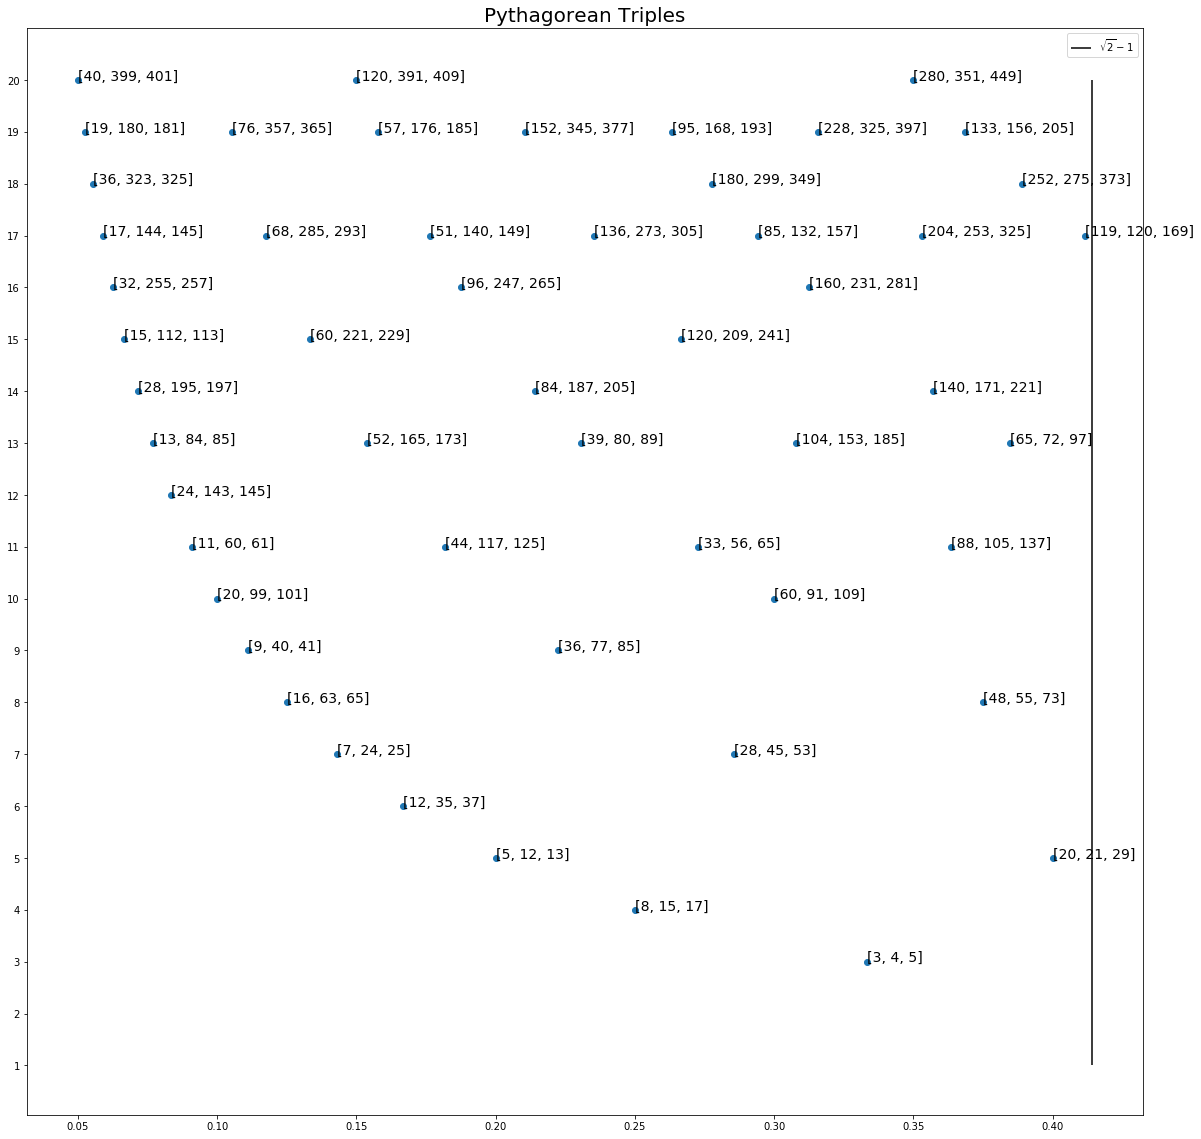

In [56]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.vlines(np.sqrt(2) - 1, ymin=1, ymax=20, label='$\sqrt{2} - 1$')

# The values of our dictionary "out" are doubles. The first member
# of each double tells us the relevant denominator and hence our
# plotting y-value.
XY = {k: v[0] for k, v in out.items()}
ax.scatter(XY.keys(), XY.values())
plt.axis()
ax.legend()
ax.set_title('Pythagorean Triples', fontdict={'size': 20})
ax.set_yticks(np.arange(1, 21))

# The second member of each double is the triple itself, so this
# will be our text!
for entry in out.items():
    ax.text(x=entry[0], y=entry[1][0], s=entry[1][1], fontdict={'size': 14})

Let's turn this into a function!

In [57]:
def plot_triples_by_ratio(n):
    """This function will plot Pythagorean Triples as text in
    a tableau where the ratio (c-b)/a -- in lowest terms -- will
    determine the position of each triple. The input is the largest
    denominator to count up to."""
    
    # Imports
    import numpy as np
    from matplotlib import pyplot as plt
    
    # First generate a sufficiently large collection of triples
    # to plot based on the input n. Then follow the procedure
    # outlined just above.
    many = triples_between_a1_a2(n**2)
    many['ratio'] = (many['c'] - many['b']) / many['a']

    out = {}
    for denom in np.arange(3, n+1):
        for num in np.arange(1, (np.sqrt(2) - 1) * denom):
            tba = (many[many['ratio'] == num / denom].head(1).values[0][:-1]).tolist()
            if tba not in [value[1] for value in out.values()]:
                out[num/denom] = (denom, tba)
                
    fig, ax = plt.subplots(figsize=(n, n))

    ax.vlines(np.sqrt(2) - 1, ymin=1, ymax=n, label='$\sqrt{2} - 1$')
    XY = {k: v[0] for k, v in out.items()}
    ax.scatter(XY.keys(), XY.values())
    plt.axis()
    ax.legend()
    ax.set_title('Pythagorean Triples', fontdict={'size': 20})
    ax.set_yticks(np.arange(1, n+1))
    for entry in out.items():
        ax.text(x=entry[0], y=entry[1][0], s=entry[1][1], fontdict={'size': 14})

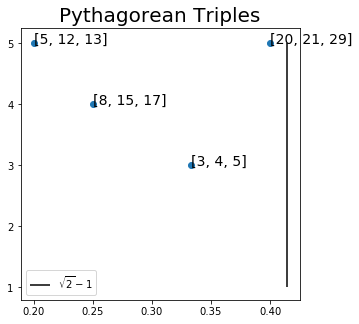

In [58]:
plot_triples_by_ratio(5)

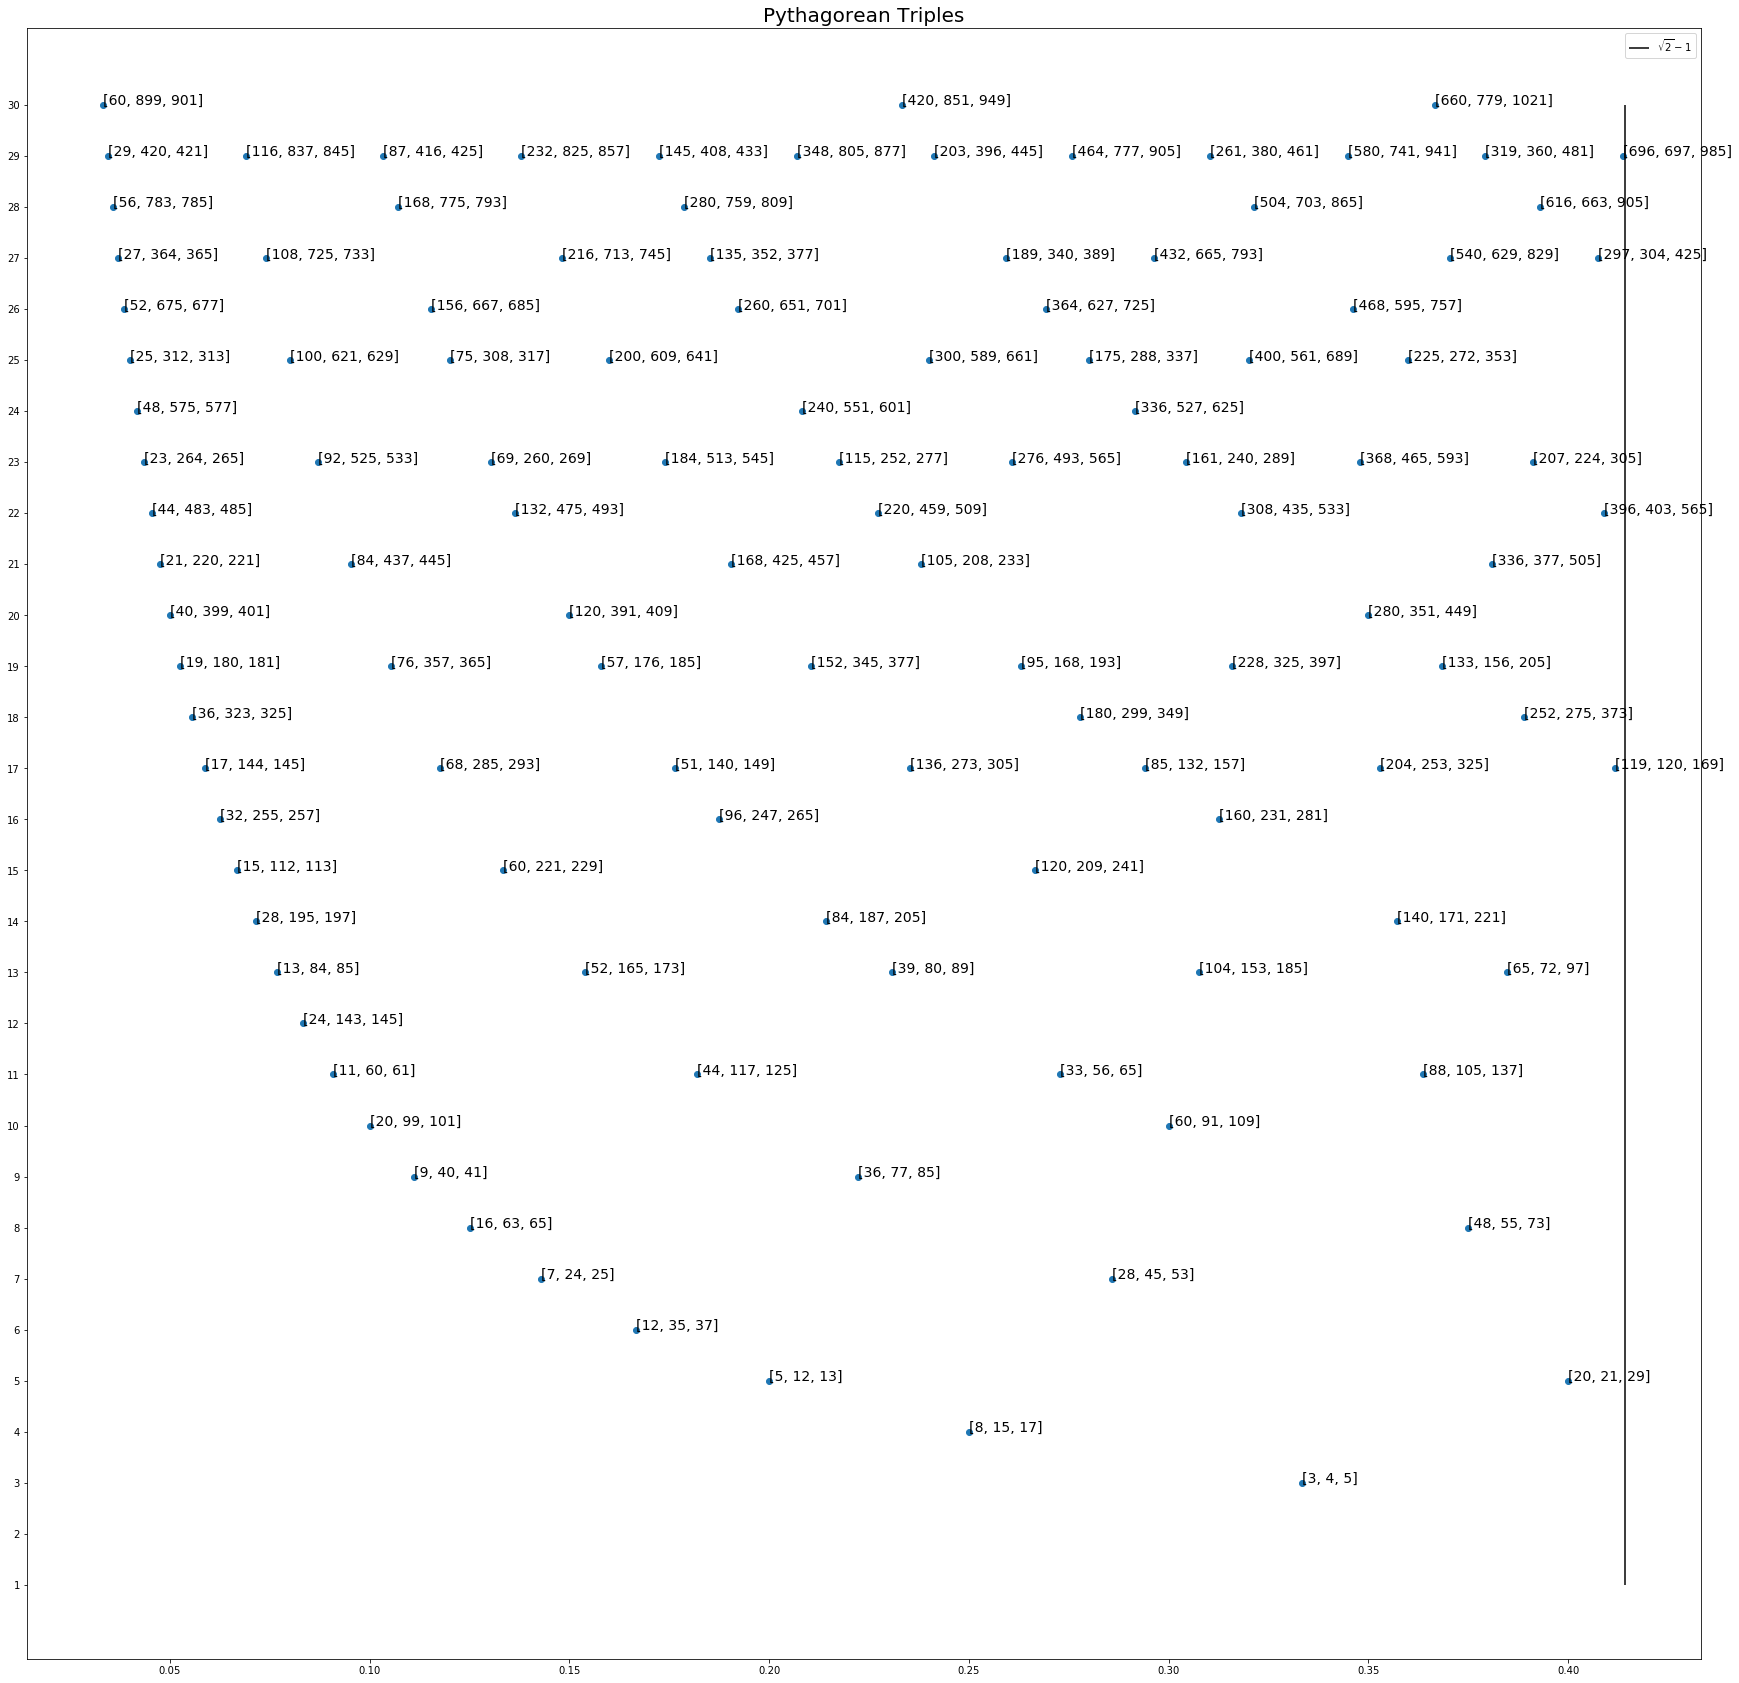

In [59]:
plot_triples_by_ratio(30)

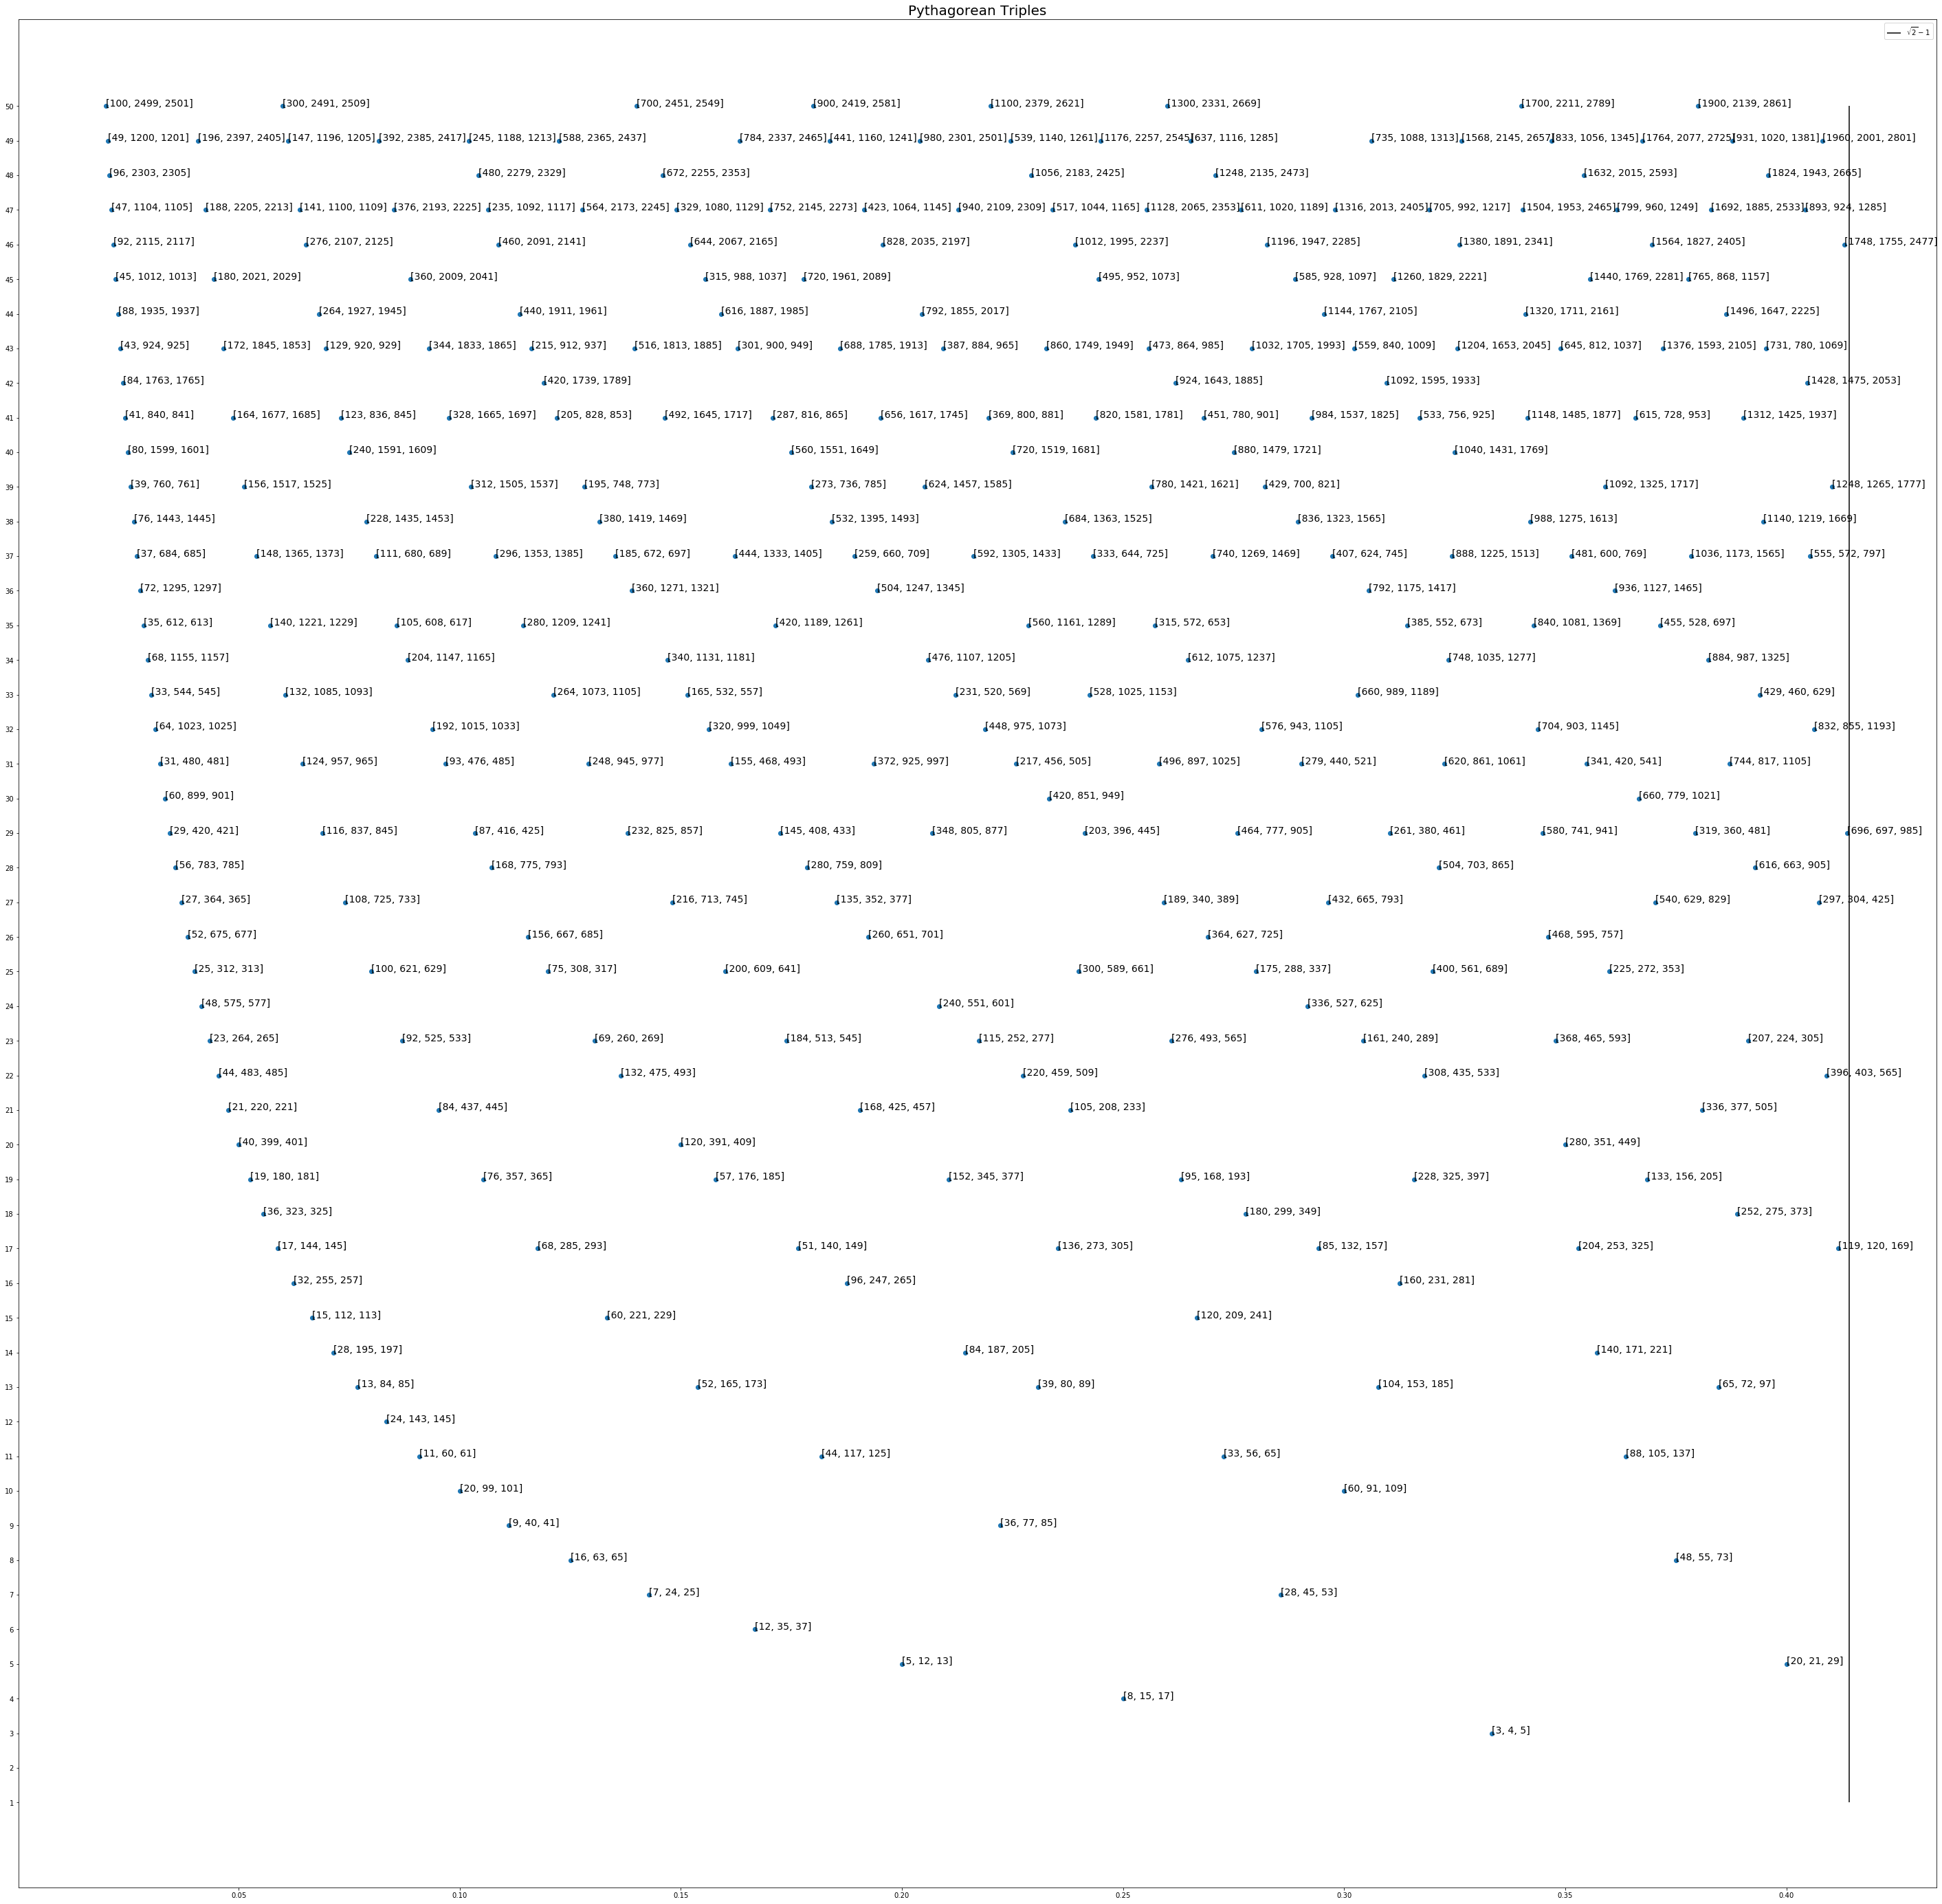

In [60]:
plot_triples_by_ratio(50)

Neat!